In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("historicos series temporales.csv")

In [3]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [4]:
df = df.set_index("timestamp")

In [ ]:
df

In [5]:
df[df['fallo'] == 1].shape

(1140, 2)

In [6]:
df.temperatura.autocorr()

0.9858464633086272

In [7]:
df.temperatura.describe()

count    12250.000000
mean         0.092542
std          0.647982
min         -4.245247
25%         -0.106532
50%          0.261121
75%          0.480146
max          1.758311
Name: temperatura, dtype: float64

In [8]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [9]:
test_stationarity(df, "temperatura")

'Stationary'

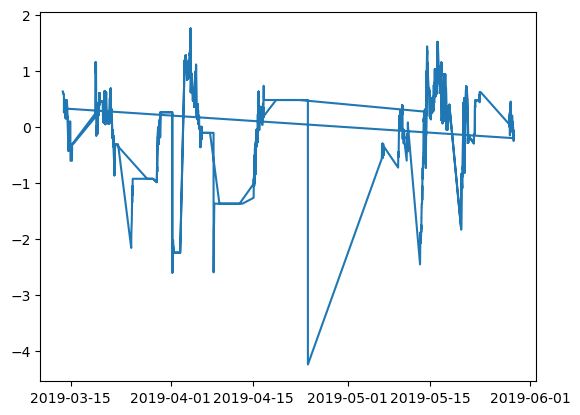

In [10]:
plt.plot(df.temperatura)

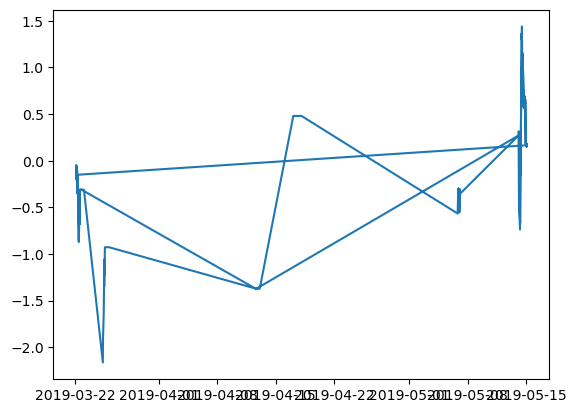

In [11]:
plt.plot(df[df['fallo']==1].temperatura)

In [12]:
# Non stationary behavior
df[0:100][["fallo", "temperatura"]].mean(),\
df[100:200][["fallo", "temperatura"]].mean(),\
df[200:300][["fallo", "temperatura"]].mean()

(fallo          0.000000
 temperatura    0.422809
 dtype: float64,
 fallo          0.00000
 temperatura   -0.15258
 dtype: float64,
 fallo          0.000000
 temperatura   -0.050323
 dtype: float64)

In [13]:
scaler = StandardScaler()

In [14]:
df['temperatura'] = scaler.fit_transform(df[['temperatura']])
df

,fallo,temperatura
timestamp,,
2019-03-13 16:10:00,0,0.834797
2019-03-13 16:15:00,0,0.834797
2019-03-13 16:35:00,0,0.834797
2019-03-13 16:40:00,0,0.834797
2019-03-13 16:45:00,0,0.834797
...,...,...
2019-05-23 09:50:00,0,0.813039
2019-05-23 09:55:00,0,0.813039
2019-05-23 10:00:00,0,0.813039


In [15]:
df.mean()

fallo          9.306122e-02
temperatura   -4.453490e-15
dtype: float64

In [16]:
df[0:100][["fallo", "temperatura"]].mean(),\
df[100:200][["fallo", "temperatura"]].mean(),\
df[200:300][["fallo", "temperatura"]].mean()

(fallo          0.000000
 temperatura    0.509706
 dtype: float64,
 fallo          0.0000
 temperatura   -0.3783
 dtype: float64,
 fallo          0.000000
 temperatura   -0.220485
 dtype: float64)

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["fallo"], df["temperatura"], test_size=0.2, shuffle=False)
# Create and fit an ARIMAX model with p=1, d=0, q=1 and exogenous variable 'temperatura'
model = ARIMA(endog=y_train, exog=X_train, order=(1, 0, 1))


C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

In [19]:
model_fit = model.fit()

In [ ]:
# Make predictions on the test set
y_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
y_pred_binary

In [ ]:
# Evaluate the model performance using mean squared error metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.4f}'.format(mse))

In [ ]:
r2_score(y_test, y_pred_binary)